In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os


import Binary_reader


from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go


In [102]:
folder_path = "/home/torps/CommSense/Datadump/Testing/Wheelchair_Testing/6/Bin/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)
complete_data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,1.215409+2.766321j,1.186069+2.754156j,1.158161+2.744273j,1.134166+2.738373j,1.116569+2.738155j,1.106628+2.743836j,1.102874+2.753804j,1.103694+2.767020j,1.107479+2.782448j,1.112615+2.799049j,...,-1.511481+3.495061j,-1.499791+3.516908j,-1.499161+3.539608j,-1.508492+3.565354j,-1.522183+3.591754j,-1.534633+3.616414j,-1.540241+3.636940j,-1.533406+3.650940j,-1.512975+3.657552j,0
1,1.262803+2.772492j,1.232981+2.760217j,1.204227+2.750190j,1.178911+2.744361j,1.155970+2.744691j,1.137300+2.750315j,1.130065+2.759125j,1.129185+2.770673j,1.131862+2.784147j,1.137059+2.797892j,...,-1.465360+3.483270j,-1.455674+3.507387j,-1.458114+3.529789j,-1.466437+3.552451j,-1.477976+3.576162j,-1.487407+3.598123j,-1.486838+3.615508j,-1.467093+3.625029j,-1.440289+3.628769j,0
2,1.311866+2.777094j,1.283921+2.765768j,1.255450+2.756542j,1.228176+2.752357j,1.198960+2.753458j,1.172950+2.758041j,1.157452+2.766260j,1.153438+2.776318j,1.155591+2.787051j,1.162588+2.797173j,...,-1.422600+3.471328j,-1.420042+3.497081j,-1.423499+3.522270j,-1.430702+3.541486j,-1.438776+3.561068j,-1.440931+3.578859j,-1.424934+3.590349j,-1.395614+3.594739j,-1.361547+3.595804j,0
3,1.356820+2.779256j,1.333368+2.770294j,1.306877+2.763334j,1.276667+2.761438j,1.244877+2.762587j,1.215839+2.765929j,1.194195+2.771483j,1.185491+2.779621j,1.186636+2.787191j,1.191176+2.798910j,...,-1.385131+3.463696j,-1.386270+3.487601j,-1.388860+3.512052j,-1.390303+3.532400j,-1.391387+3.546327j,-1.381295+3.557737j,-1.354944+3.561994j,-1.320463+3.562444j,-1.282264+3.561204j,0
4,1.399102+2.780598j,1.379009+2.773580j,1.353820+2.769095j,1.323584+2.767227j,1.292149+2.767618j,1.263363+2.769910j,1.241076+2.773744j,1.229136+2.778764j,1.226576+2.785928j,1.228879+2.795478j,...,-1.337449+3.463140j,-1.338551+3.482789j,-1.340067+3.503235j,-1.338481+3.520818j,-1.330279+3.531875j,-1.311210+3.536034j,-1.281691+3.536238j,-1.245204+3.533805j,-1.205233+3.530055j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,-2.611432+2.065119j,-2.571430+2.017389j,-2.527291+1.976823j,-2.474642+1.955693j,-2.417118+1.953466j,-2.355767+1.964180j,-2.290738+1.989664j,-2.218628+2.026838j,-2.139703+2.070227j,-2.053335+2.112793j,...,2.380757-3.341258j,2.301425-3.418298j,2.230994-3.486389j,2.171481-3.543020j,2.123460-3.590744j,2.081494-3.635501j,2.040783-3.684684j,2.006018-3.734370j,1.974271-3.782342j,1
4280,-2.643848+2.052083j,-2.599840+2.016697j,-2.549594+1.989061j,-2.493337+1.979639j,-2.432570+1.981293j,-2.367371+1.991639j,-2.298225+2.011159j,-2.224511+2.043077j,-2.142522+2.078672j,-2.054276+2.117723j,...,2.380496-3.332270j,2.302894-3.407527j,2.232058-3.477679j,2.168448-3.541793j,2.115048-3.596350j,2.067523-3.650084j,2.026661-3.705276j,1.992637-3.758779j,1.962243-3.810163j,1
4281,-2.671688+2.045516j,-2.623860+2.019813j,-2.569562+2.005881j,-2.510219+2.001255j,-2.446069+2.005144j,-2.377349+2.016757j,-2.304296+2.035305j,-2.227148+2.059997j,-2.144252+2.090498j,-2.054826+2.127094j,...,2.381727-3.324976j,2.304000-3.400025j,2.232553-3.470843j,2.167133-3.537736j,2.107483-3.601009j,2.056392-3.661798j,2.014884-3.720867j,1.980052-3.777971j,1.948989-3.832863j,1
4282,-2.698661+2.040484j,-2.642202+2.031311j,-2.580589+2.031023j,-2.515544+2.034311j,-2.447931+2.040796j,-2.376589+2.052876j,-2.302887+2.066562j,-2.223490+2.082705j,-2.134273+2.109379j,-2.039865+2.144498j,...,2.395136-3.311747j,2.317467-3.385440j,2.244396-3.456677j,2.173040-3.528813j,2.105416-3.597290j,2.048475-3.655506j,2.002932-3.712935j,1.963736-3.774034j,1.928495-3.834895j,1


In [103]:
complete_data.drop(columns='Target')

data = np.abs(complete_data)
subset = data.iloc[:, 7:22]
subset.head(20)

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,2.979017,2.994750,3.012074,3.029428,3.048211,3.070131,3.094093,3.118989,3.143717,3.167191,3.192197,3.220680,3.250266,3.278468,3.302669
1,2.991937,3.005427,3.020116,3.036278,3.056064,3.075754,3.096392,3.117472,3.136975,3.153265,3.174067,3.200149,3.227771,3.253959,3.275535
2,3.006387,3.017125,3.029157,3.046371,3.065565,3.084506,3.101721,3.117164,3.128230,3.140315,3.155650,3.176914,3.201600,3.224697,3.241528
3,3.021868,3.029280,3.041841,3.057663,3.074087,3.089376,3.102407,3.110831,3.118180,3.126765,3.137431,3.151754,3.171540,3.189662,3.202545
4,3.038470,3.043992,3.053661,3.065557,3.077770,3.088389,3.095502,3.099748,3.103751,3.108563,3.115186,3.124551,3.137523,3.151690,3.164435
5,3.061194,3.073482,3.084225,3.091498,3.096834,3.094870,3.077082,3.051955,3.038121,3.036565,3.041459,3.060838,3.090363,3.109513,3.121331
6,3.093775,3.105794,3.117019,3.121596,3.114104,3.086628,3.047489,3.007639,2.973535,2.958681,2.969282,2.995539,3.024837,3.056074,3.079193
7,3.120968,3.131515,3.137129,3.132796,3.110064,3.069917,3.021480,2.973854,2.936114,2.917323,2.920586,2.939411,2.968480,3.002456,3.035985
8,3.115078,3.123188,3.127196,3.124024,3.107995,3.069232,3.019487,2.970101,2.931042,2.908669,2.904312,2.920493,2.947932,2.980297,3.011329
9,3.100298,3.104368,3.105764,3.101805,3.092231,3.067221,3.023735,2.978631,2.944763,2.919609,2.904462,2.910592,2.932851,2.960147,2.984872


In [104]:
selected_chunks = []

# Step of 28 to skip every other block
for start in range(0, len(complete_data), 28):
    end = start + 14
    if end <= len(complete_data):
        chunk = complete_data.iloc[start:end]
        selected_chunks.append(chunk)

combined_df = pd.concat(selected_chunks, ignore_index=True)

combined_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,1.215409+2.766321j,1.186069+2.754156j,1.158161+2.744273j,1.134166+2.738373j,1.116569+2.738155j,1.106628+2.743836j,1.102874+2.753804j,1.103694+2.767020j,1.107479+2.782448j,1.112615+2.799049j,...,-1.511481+3.495061j,-1.499791+3.516908j,-1.499161+3.539608j,-1.508492+3.565354j,-1.522183+3.591754j,-1.534633+3.616414j,-1.540241+3.636940j,-1.533406+3.650940j,-1.512975+3.657552j,0
1,1.262803+2.772492j,1.232981+2.760217j,1.204227+2.750190j,1.178911+2.744361j,1.155970+2.744691j,1.137300+2.750315j,1.130065+2.759125j,1.129185+2.770673j,1.131862+2.784147j,1.137059+2.797892j,...,-1.465360+3.483270j,-1.455674+3.507387j,-1.458114+3.529789j,-1.466437+3.552451j,-1.477976+3.576162j,-1.487407+3.598123j,-1.486838+3.615508j,-1.467093+3.625029j,-1.440289+3.628769j,0
2,1.311866+2.777094j,1.283921+2.765768j,1.255450+2.756542j,1.228176+2.752357j,1.198960+2.753458j,1.172950+2.758041j,1.157452+2.766260j,1.153438+2.776318j,1.155591+2.787051j,1.162588+2.797173j,...,-1.422600+3.471328j,-1.420042+3.497081j,-1.423499+3.522270j,-1.430702+3.541486j,-1.438776+3.561068j,-1.440931+3.578859j,-1.424934+3.590349j,-1.395614+3.594739j,-1.361547+3.595804j,0
3,1.356820+2.779256j,1.333368+2.770294j,1.306877+2.763334j,1.276667+2.761438j,1.244877+2.762587j,1.215839+2.765929j,1.194195+2.771483j,1.185491+2.779621j,1.186636+2.787191j,1.191176+2.798910j,...,-1.385131+3.463696j,-1.386270+3.487601j,-1.388860+3.512052j,-1.390303+3.532400j,-1.391387+3.546327j,-1.381295+3.557737j,-1.354944+3.561994j,-1.320463+3.562444j,-1.282264+3.561204j,0
4,1.399102+2.780598j,1.379009+2.773580j,1.353820+2.769095j,1.323584+2.767227j,1.292149+2.767618j,1.263363+2.769910j,1.241076+2.773744j,1.229136+2.778764j,1.226576+2.785928j,1.228879+2.795478j,...,-1.337449+3.463140j,-1.338551+3.482789j,-1.340067+3.503235j,-1.338481+3.520818j,-1.330279+3.531875j,-1.311210+3.536034j,-1.281691+3.536238j,-1.245204+3.533805j,-1.205233+3.530055j,0
5,1.438761+2.784352j,1.419334+2.776429j,1.398460+2.769983j,1.373471+2.766218j,1.345468+2.764811j,1.319396+2.765447j,1.298047+2.768233j,1.294153+2.774181j,1.310131+2.780260j,1.324932+2.785139j,...,-1.239918+3.482419j,-1.237473+3.495857j,-1.238895+3.509112j,-1.245468+3.517036j,-1.247638+3.515717j,-1.229599+3.509046j,-1.196332+3.501655j,-1.159357+3.495357j,-1.120280+3.489408j,0
6,1.474518+2.788465j,1.454580+2.779485j,1.435317+2.771129j,1.417581+2.764272j,1.397933+2.759896j,1.377255+2.758146j,1.372780+2.761077j,1.383896+2.766998j,1.399746+2.772484j,1.420499+2.774526j,...,-1.148592+3.510047j,-1.134591+3.515185j,-1.138688+3.516106j,-1.144530+3.508670j,-1.142495+3.497122j,-1.134023+3.484271j,-1.110526+3.469980j,-1.073933+3.457511j,-1.040932+3.452261j,0
7,1.508946+2.791132j,1.489474+2.780848j,1.471190+2.770981j,1.455285+2.761950j,1.442947+2.754172j,1.440340+2.750635j,1.449325+2.752170j,1.464636+2.755954j,1.481008+2.759166j,1.493176+2.758986j,...,-1.075802+3.541017j,-1.061614+3.531782j,-1.053719+3.519219j,-1.049486+3.503128j,-1.045538+3.485113j,-1.038496+3.466780j,-1.024983+3.449732j,-1.001618+3.435574j,-0.971025+3.426864j,0
8,1.549361+2.795309j,1.530058+2.783678j,1.511876+2.772207j,1.496142+2.761002j,1.482262+2.748663j,1.470654+2.738014j,1.475177+2.735285j,1.489042+2.736141j,1.504821+2.736753j,1.517614+2.734264j,...,-1.029690+3.557300j,-1.016760+3.546017j,-1.013058+3.533025j,-1.009140+3.514212j,-1.003895+3.492480j,-0.994664+3.470124j,-0.976138+3.448533j,-0.939991+3.426801j,-0.898012+3.408264j,0
9,1.589798+2.801519j,1.570805+2.789216j,1.552634+2.775933j,1.536286+2.761071j,1.518596+2.743900j,1.502335+2.727489j,1.493506+2.716573j,1.500775+2.712844j,1.513707+2.710312j,1.524772+2.705705j,...,-0.996681+3.572473j,-0.990747+3.559813j,-0.988162+3.546361j,-0.985967+3.528889j,-0.979211+3.505895j,-0.964542+3.480933j,-0.932622+3.454751j,-0.885074+3.425600j,-0.832261+3.397754j,0


In [105]:

def normalize(x):
    return (x-stats['min'])/ (stats['max'] - stats['min'])

# complete_data = normalize(complete_data)

In [106]:
stats = complete_data.describe().transpose()
stats.tail(10)

,count,mean,std,min,25%,50%,75%,max
591,4284.0+ 0.0j,0.116294-0.092697j,4.152715+0.000000j,-4.761510+1.230816j,-2.665171+2.433716j,0.273426+4.400921j,2.934407+2.537885j,5.045259-0.656505j
592,4284.0+ 0.0j,0.114895-0.092149j,4.144247+0.000000j,-4.798354+1.214104j,-2.643721+2.054077j,0.272802-3.754516j,2.913492-1.035934j,5.048591-0.742616j
593,4284.0+ 0.0j,0.113376-0.091731j,4.137219+0.000000j,-4.826856-0.666948j,-2.633362+3.322053j,0.282991-4.013829j,2.895458-1.950526j,5.048293-0.799585j
594,4284.0+ 0.0j,0.111803-0.091330j,4.132451+0.000000j,-4.857579-0.673644j,-2.637409-1.594855j,0.270897+0.153982j,2.878064+2.238525j,5.046615-0.834679j
595,4284.0+ 0.0j,0.110170-0.090898j,4.129964+0.000000j,-4.886855-0.683948j,-2.636083+1.510050j,0.299096+4.378538j,2.864209+1.018554j,5.044226-0.857273j
596,4284.0+ 0.0j,0.108475-0.090338j,4.129959+0.000000j,-4.913630-0.691403j,-2.642198-3.290028j,0.300242+4.233221j,2.859520-3.863261j,5.041796-0.876745j
597,4284.0+ 0.0j,0.106753-0.089529j,4.133379+0.000000j,-4.936853-0.689550j,-2.648118-3.270389j,0.326220+0.373689j,2.856686+2.286439j,5.039994-0.902470j
598,4284.0+ 0.0j,0.105017-0.088475j,4.140337+0.000000j,-4.955471-0.671931j,-2.648413+3.362900j,0.343788+3.535848j,2.858445+0.793084j,5.039489-0.943825j
599,4284.0+ 0.0j,0.103277-0.087250j,4.149606+0.000000j,-4.968576-0.636785j,-2.657728-1.483389j,0.360511+0.144659j,2.856041+1.353041j,5.040362-1.001154j
Target,4284.0+ 0.0j,0.490196+0.000000j,0.499962+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,1.000000+0.000000j,1.000000+0.000000j


In [107]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

%matplotlib notebook

mag_0 = []
mag_1 = []

# Split features and target
features = complete_data.drop(columns='Target')
target = complete_data['Target']

num_symbols = 14

for i in range(10):
    count = i*num_symbols

    # Take first 100 symbols (rows) with Target == 0
    data_0 = features[target == 0].iloc[count:count+num_symbols].astype(np.complex128)
    mag_0.append(np.abs(data_0.values))

    # Take first 100 symbols (rows) with Target == 1
    data_1 = features[target == 1].iloc[count:count+num_symbols].astype(np.complex128)
    mag_1.append(np.abs(data_1.values))

    # Create X (subcarriers) and Y (symbols) grid
    # X, Y = np.meshgrid(np.arange(mag_0.shape[1]), np.arange(mag_0.shape[0]))


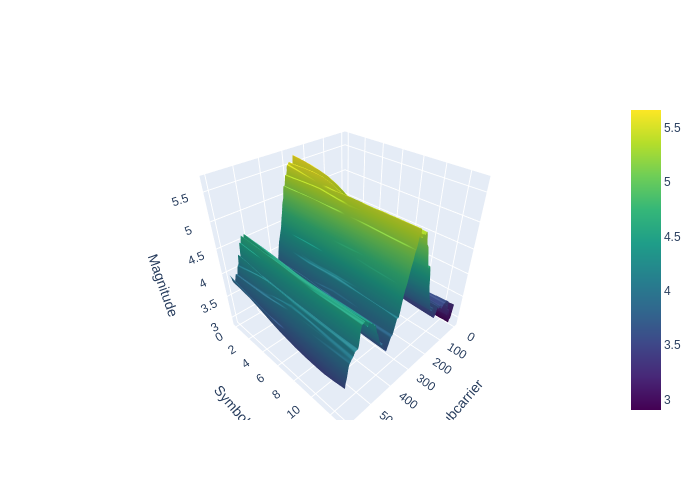

In [108]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

import plotly.io as pio
pio.renderers.default = "png"


# Assume mag_0, mag_1 are 100x600 numpy arrays from earlier
Z = mag_0[0]  # or mag_1
x = np.arange(Z.shape[1])  # subcarriers
y = np.arange(Z.shape[0])  # symbols

fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y, colorscale='Viridis')])
fig.update_layout(
    # title='Interactive 3D Magnitude Plot (Target = 0)',
    scene=dict(
        xaxis_title='Subcarrier',
        yaxis_title='Symbol',
        zaxis_title='Magnitude'
    ),
    autosize=True
)

fig.show()





In [109]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Use Kaleido for image export
pio.renderers.default = "vscode"

# Example: Assuming mag_0 is already defined and contains 2D arrays
Z = mag_0[0]  # shape (14, 600), for example
x = np.arange(Z.shape[1])  # subcarriers
y = np.arange(Z.shape[0])  # symbols

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y, colorscale='Viridis')])

# Update layout: Move plot down by setting center.z negative
fig.update_layout(
    scene=dict(
        xaxis_title='Subcarrier',
        yaxis_title='Symbol',
        zaxis_title='Magnitude',
        camera=dict(
            eye=dict(x=1.25, y=1.25, z=1),      # Viewpoint
            center=dict(x=0, y=0, z=-0.18)       # Move plot **down**
        )
    ),
    autosize=False,
    width=1000,
    height=800,
    margin=dict(l=0, r=0, t=0, b=0)
)

# Save image with higher resolution
fig.write_image("surface_plot_shifted_down.png", scale=2)



/tmp/ipykernel_6980/2757692860.py:34: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




In [121]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assume mag_0, mag_1 are 100x600 numpy arrays from earlier
Z = mag_1[0]  # or mag_1
x = np.arange(Z.shape[1])  # subcarriers
y = np.arange(Z.shape[0])  # symbols

fig = go.Figure(data=[go.Surface(z=Z, x=x, y=y, colorscale='Viridis')])
fig.update_layout(
    title='Interactive 3D Magnitude Plot (Target = 1)',
    scene=dict(
        xaxis_title='Subcarrier',
        yaxis_title='Symbol',
        zaxis_title='Magnitude'
    ),
    autosize=True
)

fig.show()

In [111]:
print(len(mag_0))   
print(len(mag_1))

mag_0_arr = np.array(mag_0, dtype=object)
mag_1_arr = np.array(mag_1, dtype=object)

print(len(mag_0_arr[1][1]))
print(len(mag_1_arr[1][1]))

10
10
600
600


In [120]:
import numpy as np
import plotly.graph_objects as go

# Convert mag_0 and mag_1 lists to 3D NumPy arrays: (10, 100, 600)
# mag_0_arr = np.array(mag_0)
# mag_1_arr = np.array(mag_1)

# Compute the difference for all 10: shape (10, 100, 600)
diffs = mag_0_arr - mag_1_arr

# Compute average across the 10 blocks: shape (100, 600)
avg_diff = np.mean(diffs, axis=0)

# Create axes
x = np.arange(avg_diff.shape[1])  # Subcarriers (600)
y = np.arange(avg_diff.shape[0])  # Symbols (100)

# Plot the average difference
fig = go.Figure(data=[
    go.Surface(z=avg_diff, x=x, y=y, colorscale='RdBu', colorbar_title='Avg ΔMagnitude')
])

fig.update_layout(
    title='Average Magnitude Difference (Target 0 - Target 1)',
    scene=dict(
        xaxis_title='Subcarrier',
        yaxis_title='Symbol',
        zaxis_title='Magnitude Difference'
    ),
    autosize=True
)

fig.show()



In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Assume mag_0_arr and mag_1_arr are shape (10, 100, 600)

# Compute the difference for all 10: shape (10, 100, 600)
diffs = mag_0_arr - mag_1_arr

# Compute average across the 10 blocks: shape (100, 600)
avg_diff = np.mean(diffs, axis=0)

# Create the figure and 3D axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create axes
x = np.arange(avg_diff.shape[1])  # Subcarriers (600)
y = np.arange(avg_diff.shape[0])  # Symbols (100)
X, Y = np.meshgrid(x, y)

# Plot the surface
surf = ax.plot_surface(X, Y, avg_diff, cmap='RdBu')

# Add labels and color bar
ax.set_title("Average Magnitude Difference (Target 0 - Target 1)")
ax.set_xlabel("Subcarrier")
ax.set_ylabel("Symbol")
ax.set_zlabel("Magnitude Difference")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Save the figure
# plt.savefig("test_plot.png", dpi=300)
plt.show()


<IPython.core.display.Javascript object>

In [114]:
import numpy as np
import plotly.graph_objects as go

# Convert to NumPy arrays
mag_0_arr = np.array(mag_0)  # Shape: (N, 100, 600)
mag_1_arr = np.array(mag_1)  # Shape: (N, 100, 600)

# Step 1: Compute average of mag_0 across blocks → shape: (100, 600)
avg_mag_0 = np.mean(mag_0_arr, axis=0)

# Step 2: Compute difference for each mag_1 block against avg_mag_0
diffs = mag_1_arr - avg_mag_0  # Broadcasting works: (N, 100, 600) - (100, 600)

# Step 3: Average the diffs across blocks → shape: (100, 600)
avg_diff = np.mean(diffs, axis=0)

# Step 4: Create axes
x = np.arange(avg_diff.shape[1])  # Subcarriers (600)
y = np.arange(avg_diff.shape[0])  # Symbols (100)

# Step 5: Plot the average difference
fig = go.Figure(data=[
    go.Surface(z=avg_diff, x=x, y=y, colorscale='RdBu', colorbar_title='Avg ΔMagnitude')
])

fig.update_layout(
    title='Avg (Target 1 - Mean Target 0) Magnitude Difference',
    scene=dict(
        xaxis_title='Subcarrier',
        yaxis_title='Symbol',
        zaxis_title='Magnitude Difference'
    ),
    autosize=True
)

fig.show()
